<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
!pip install apricot-select
!pip install memory-profiler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from scipy import sparse
import scipy
import matplotlib.pyplot as plt
from timeit import timeit 
%load_ext memory_profiler

In [ ]:
data =np.array( [(4.5,13.5), (5,13.5), (5.5,13.5), (14.5,13.5), (15,13.5), (15.5,13.5),
(4.5,13), (5,13), (5.5,13), (14.5,13), (15,13), (15.5,13),
(4.5,12.5), (5,12.5), (5.5,12.5), (14.5,12.5), (15,12.5), (15.5,12.5),
(4.5,7.5), (5,7.5), (5.5,7.5), (14.5,7.5), (15,7.5), (15.5,7.5),
(4.5,7), (5,7), (5.5,7), (14.5,7), (15,7), (15.5,7),
(4.5,6.5), (5,6.5), (5.5,6.5), (14.5,6.5), (15,6.5), (15.5,6.5),
(7.5,10), (12.5,10), (10,12.5), (10,7.5), (4.5, 15.5), (5,9.5), (5,10.5)] )

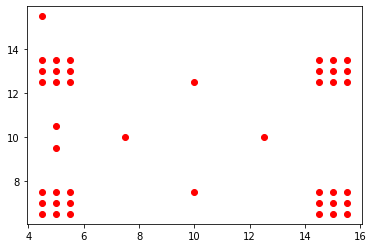

In [ ]:
#Plot of original data
for el in data:
    #print(el)
    plt.plot(el[0],el[1],'ro')
plt.show()

In [ ]:
from apricot import FacilityLocationSelection
num_subsets = 10
obj = FacilityLocationSelection(num_subsets, metric='euclidean', optimizer='lazy')
obj=obj.fit(data)
subsets= obj.transform(data)
subsets

array([[ 7.5, 10. ],
       [12.5, 10. ],
       [ 5. , 13. ],
       [ 5. ,  7.5],
       [15. , 13. ],
       [15. ,  7. ],
       [10. , 12.5],
       [10. ,  7.5],
       [ 5. , 10.5],
       [ 4.5, 15.5]])

In [ ]:
print(obj.ranking) #Selected datapoints in order of their gain
print(obj.gains) #Gain of the corrosponding datapoint when it was added to the growing subset

[36 37  7 19 10 28 38 39 42 40]
[7.12275e+03 9.25000e+02 1.70250e+02 1.37500e+02 1.37250e+02 1.37250e+02
 1.25000e+01 1.25000e+01 9.25000e+00 6.50000e+00]


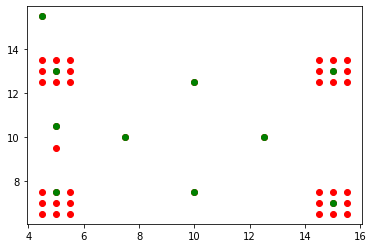

In [ ]:
#Plot of data discriminating selected data points (green) from others (red)
for el in data:
    plt.plot(el[0],el[1],'ro')

for el in subsets:    
    plt.plot(el[0],el[1],'go')

plt.show()

In [ ]:
#Loading large dataset for space and time analysis
data = None
with open('/content/drive/MyDrive/submodlib_data/large_data.npy', 'rb') as f:
        data = np.load(f, allow_pickle=True)

In [ ]:
np.shape(data)

(100000, 2000)

In [ ]:
#Timing Analysis
def f_time():
  num_subsets = 10
  obj = FacilityLocationSelection(num_subsets, metric='euclidean', optimizer='lazy')
  obj=obj.fit(data)
  subsets= obj.transform(data)

print(timeit('f_time', 'from __main__ import f_time'),'\n')

0.014942958999995426 



In [ ]:
#Space Analysis
#%%file mprun_demo.py
def f_space():
  from apricot import FacilityLocationSelection
  num_subsets = 10
  obj = FacilityLocationSelection(num_subsets, metric='euclidean', optimizer='lazy')
  obj=obj.fit(data)
  subsets= obj.transform(data)

In [ ]:
#from mprun_demo import f_space
#%mprun -f f_space f_space()

#%memit f_space() #Running this on larger dataset is causing memory overflow

In [ ]:
#Space Analysis on small handcrafted data
%cd /content/drive/MyDrive/submodlib_data/

!python apricot_mem_analysis_small.py

/content/drive/MyDrive/submodlib_data
Filename: apricot_mem_analysis_small.py

Line #    Mem usage    Increment  Occurences   Line Contents
    19    165.4 MiB    165.4 MiB           1   @profile
    20                                         def f_analysis():
    21    165.4 MiB      0.0 MiB           1     num_subsets = 10
    22    165.4 MiB      0.0 MiB           1     obj = FacilityLocationSelection(num_subsets, metric='euclidean', optimizer='lazy')
    23    179.9 MiB     14.5 MiB           1     obj=obj.fit(data)
    24    179.9 MiB      0.0 MiB           1     subsets= obj.transform(data)




In [ ]:
#Space Analysis on very large randomly generated data
#Given configuration of data is too large--> causes memory overflow issues
%cd /content/drive/MyDrive/submodlib_data/ 

!python apricot_mem_analysis_large.py 

/content/drive/MyDrive/submodlib_data
tcmalloc: large alloc 1600004096 bytes == 0x3b66000 @  0x7f50fe8201e7 0x7f50fc3a041e 0x7f50fc3f4f1c 0x7f50fc3f5b4b 0x7f50fc497270 0x50a4a5 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x50ad03 0x634e72 0x634f27 0x6386df 0x639281 0x4b0dc0 0x7f50fe41dbf7 0x5b259a
tcmalloc: large alloc 80000000000 bytes == 0x63216000 @  0x7f50fe8201e7 0x7f50fc3a041e 0x7f50fc3f0bdb 0x7f50fc3f0c78 0x7f50fc4acb79 0x7f50fc4af8dd 0x7f50fc5d771a 0x7f50fc5d8276 0x5a48ec 0x5a4fb8 0x59c922 0x4a3ae0 0x513444 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x509900
^C
